In [5]:
import torch
print(torch.__version__)
print(torch.version.cuda)

1.11.0+cu113
11.3


In [6]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [7]:
!pip install -q flair

     |████████████████████████████████| 401 kB 5.3 MB/s 
     |████████████████████████████████| 788 kB 34.9 MB/s 
     |████████████████████████████████| 4.4 MB 41.1 MB/s 
     |████████████████████████████████| 1.6 MB 27.3 MB/s 
     |████████████████████████████████| 981 kB 61.7 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 57.0 MB/s 
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 199 kB 64.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 596 kB 66.8 MB/s 
     |████████████████████████████████| 6.6 MB 30.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.7 require

In [8]:
import flair
import pandas as pd
import numpy as np

In [9]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

# initialize the word embeddings
glove_embedding = WordEmbeddings('pl')
glove_embedding

2022-06-16 17:43:16,740 https://flair.informatik.hu-berlin.de/resources/embeddings/token/pl-wiki-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpyu5hkj6f


100%|██████████| 1199998928/1199998928 [00:49<00:00, 24450200.51B/s]

2022-06-16 17:44:06,224 copying /tmp/tmpyu5hkj6f to cache at /root/.flair/embeddings/pl-wiki-fasttext-300d-1M.vectors.npy


2022-06-16 17:44:10,324 removing temp file /tmp/tmpyu5hkj6f
2022-06-16 17:44:10,984 https://flair.informatik.hu-berlin.de/resources/embeddings/token/pl-wiki-fasttext-300d-1M not found in cache, downloading to /tmp/tmp9tzuhpd2


100%|██████████| 40874795/40874795 [00:02<00:00, 17348163.37B/s]

2022-06-16 17:44:13,731 copying /tmp/tmp9tzuhpd2 to cache at /root/.flair/embeddings/pl-wiki-fasttext-300d-1M
2022-06-16 17:44:13,783 removing temp file /tmp/tmp9tzuhpd2


WordEmbeddings(
  'pl'
  (embedding): Embedding(1000000, 300)
)

In [10]:
# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])
document_embeddings

DocumentPoolEmbeddings(
  fine_tune_mode=none, pooling=mean
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'pl'
      (embedding): Embedding(1000000, 300)
    )
  )
)

In [11]:
# create an example sentence
from flair.data import Sentence
sentence = Sentence('Janek weź się w końcu ogarnij.')
print(f"sentence: {sentence}")
for token in sentence.tokens:
    print(token)

print(f"konkretny token: {sentence.get_token(3)}")

sentence: Sentence: "Janek weź się w końcu ogarnij ."
Token[0]: "Janek"
Token[1]: "weź"
Token[2]: "się"
Token[3]: "w"
Token[4]: "końcu"
Token[5]: "ogarnij"
Token[6]: "."
konkretny token: Token[2]: "się"


In [12]:
# embed the sentence with our document embedding
document_embeddings.embed(sentence)

In [63]:
import random 
def split(df, test_fraction, grouping_var, seed=1234, verbose=True):
    """Used to avoid having scans from the same cases in both train and test sets"""
    frac = int(len(set(df[grouping_var])) * test_fraction)
    random.seed(seed)
    test_cases = random.sample(set(df[grouping_var]), frac)
    test_mask = df[grouping_var].isin(test_cases)

    X_train = df.text[~test_mask]
    y_train = df.img_class[~test_mask]
    X_test = df.text[test_mask]
    y_test = df.img_class[test_mask]

    if verbose:
        logging.info(f"Test fraction: {round(len(X_test)/len(df), 2)}")

    return X_train, X_test, y_train, y_test, test_mask

In [86]:
df = pd.read_csv("df.csv",index_col="Unnamed: 0")
print(df.shape)
df[:3]

(867, 5)


,case,img_name,img_label,img_class,text
0,430518,430518_medicalCertificateConfirmingTheCompleti...,"Zaświadczenie lekarskie / rehabilitacyjne, w t...",Zaświadczenie lekarskie,o 46 06 VEZ 750 XJ YBAM dYdOLNYY MZ DUQ 412 e...
1,430518,430518_medicalDocumentatnionFile_1__0,Karta informacyjna z SOR/Izby Przyjęć,SOR/Izba Przyjęć,POWÓD ODMOWY WYDANE DRUKI ne Potwierdzam odb...
2,430518,430518_medicalDocumentatnionFile_2__0,Wyniki badań obrazowych,Wyniki badań obrazowych i histopatologicznych,zm WP BP NNP DPD o ŁZA LJ x Wojewódzki Szp...


In [87]:
X_train, X_test, y_train, y_test, test_mask = split(df, test_fraction=0.1, grouping_var="case", seed=1234, verbose=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test_mask.shape)

(779,)
(88,)
(779,)
(88,)
(867,)


In [ ]:
def get_embeding(x):
    sentence = Sentence(str(x))
    document_embeddings.embed(sentence)
    return sentence.embedding.tolist()

X_train_vec = pd.DataFrame(X_train.apply(get_embeding).tolist())
X_test_vec = pd.DataFrame(X_test.apply(get_embeding).tolist())

In [94]:
print(X_train_vec.shape)
print(X_test_vec.shape)
print(y_train.shape)
print(y_test.shape)

(779, 300)
(88, 300)
(779,)
(88,)


In [95]:
from lightgbm import LGBMClassifier, plot_importance

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

In [98]:
est = LGBMClassifier(n_estimators=50, random_state=1234).fit(X_train_vec, y_train)
y_pred = est.predict(X_test_vec)

accuracy_score(y_test, y_pred)

0.6590909090909091

In [99]:
import tqdm

# Run models splitted by case_id

In [103]:
RUNS = 20
accuracies = []
for seed in tqdm.tqdm(random.sample(range(0, 10000), RUNS)):
    X_train, X_test, y_train, y_test, test_mask = split(df, test_fraction=0.1, grouping_var="case", seed=seed, verbose=False)

    X_train_vec = pd.DataFrame(X_train.apply(get_embeding).tolist())
    X_test_vec = pd.DataFrame(X_test.apply(get_embeding).tolist())

    est = LGBMClassifier(n_estimators=50, random_state=seed).fit(X_train_vec, y_train)
    y_pred = est.predict(X_test_vec)

    accuracies.append(accuracy_score(y_test, y_pred))

print("Avg accuracy:", round(np.mean(accuracies), 2))
print([round(x, 2) for x in accuracies[-10:]])
print(f"Accuracy 1Q-3Q range: {round(np.quantile(accuracies, 0.25), 2)}-{round(np.quantile(accuracies, 0.75), 2)}")



100%|██████████| 20/20 [08:49<00:00, 26.49s/it]

Avg accuracy: 0.67
[0.69, 0.7, 0.64, 0.67, 0.59, 0.7, 0.65, 0.57, 0.67, 0.42]
Accuracy 1Q-3Q range: 0.63-0.7


### Run models splitted by img_name

In [104]:
accuracies = []
for seed in tqdm.tqdm(random.sample(range(0, 10000), RUNS)):
    X_train, X_test, y_train, y_test, test_mask = split(df, test_fraction=0.1, grouping_var="img_name", seed=seed, verbose=False)

    X_train_vec = pd.DataFrame(X_train.apply(get_embeding).tolist())
    X_test_vec = pd.DataFrame(X_test.apply(get_embeding).tolist())

    est = LGBMClassifier(n_estimators=50, random_state=seed).fit(X_train_vec, y_train)
    y_pred = est.predict(X_test_vec)

    accuracies.append(accuracy_score(y_test, y_pred))

print("Avg accuracy:", round(np.mean(accuracies), 2))
print([round(x, 2) for x in accuracies[-10:]])
print(f"Accuracy 1Q-3Q range: {round(np.quantile(accuracies, 0.25), 2)}-{round(np.quantile(accuracies, 0.75), 2)}")

100%|██████████| 20/20 [08:50<00:00, 26.52s/it]

Avg accuracy: 0.75
[0.83, 0.69, 0.76, 0.76, 0.85, 0.73, 0.64, 0.67, 0.77, 0.79]
Accuracy 1Q-3Q range: 0.71-0.79


### More detailed evaluation

                                                                              precision    recall  f1-score   support

Historia zdrowia i choroby / historia choroby poradni specjalistycznej / POZ       0.72      0.97      0.82        29
                                          Inne nieinteresujące - niemedyczne       1.00      0.75      0.86         4
                                               Inne nieinteresujące medyczne       0.67      0.14      0.24        14
                                                               Nierozpoznane       0.50      0.67      0.57         3
                                                            SOR/Izba Przyjęć       1.00      0.57      0.73         7
                               Wyniki badań obrazowych i histopatologicznych       1.00      1.00      1.00         5
                                                           Wypis ze szpitala       0.87      0.95      0.91        21
                                                     Za

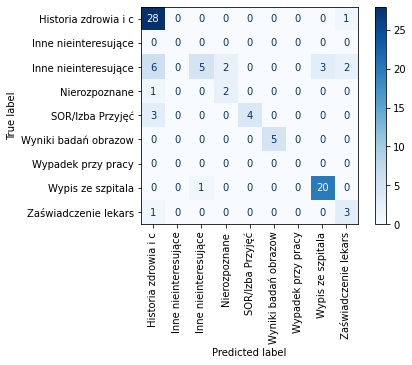

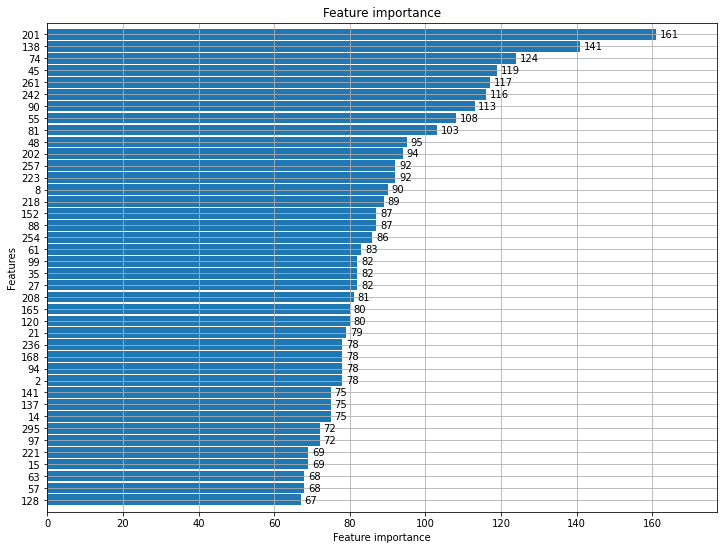

In [102]:
X_train, X_test, y_train, y_test, test_mask = split(df, test_fraction=0.1, grouping_var="img_name", seed=1234, verbose=False)

X_train_vec = pd.DataFrame(X_train.apply(get_embeding).tolist())
X_test_vec = pd.DataFrame(X_test.apply(get_embeding).tolist())

est = LGBMClassifier(n_estimators=50, random_state=seed).fit(X_train_vec, y_train)
y_pred = est.predict(X_test_vec)

print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(
   pd.Series(y_test).str.slice(0,20), pd.Series(y_pred).str.slice(0,20), 
   xticks_rotation=90, labels=[x[0:20] for x in est.classes_], cmap=plt.cm.Blues)

plt.show()
plot_importance(est, figsize=(12, 9), max_num_features = 40, height=.9)